<a href="https://colab.research.google.com/github/noahfranz13/COVID-Plots/blob/master/covid_plot_by_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from astropy.table import Table, vstack
import datetime

%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def plot_states(states, data, change_in_cases=True):

  '''
  states: list of states user wants to plot
  data: dictionary of data for with states as keys
  change_in_cases: True means plot a histogram of the change in cases day-by-day,
                   False means plot a line graph of Cases vs. Date
  '''

  if change_in_cases == True:

    nydata = data[states[0]]

    sb.set(context='notebook', palette='Set2')
    fig, ax = plt.subplots(1,1,figsize=(12,6))

    for state in states:
      
      data1 = data[state]
      netdates = []

      for i in range(len(data1)):
        if i != 0:
          chg = data1['cases'][i] - data1['cases'][i-1]

          k = 0
          while k < chg:
            netdates.append(data1['datetime'][i])
            k+=1

      ax.hist(netdates, bins=len(nydata['datetime'])-1, label=state, alpha=0.5)
      ax.set_ylabel('Change in Number of Cases')
      ax.set_xlabel('Date')
      ax.legend()

  else:

    sb.set(context='notebook', style='ticks', palette='Set2')

    fig, ax = plt.subplots(1,1,figsize=(20,8))
    ax.set_xlim(min(sdata['New York']['datetime']), max(sdata['New York']['datetime']))
    ax.set_ylabel('Number of Cases')
    ax.set_xlabel('Date')

    for state in states:
      ax.plot(data[state]['datetime'], data[state]['cases'], label=state)

    ax.legend()


def plot_w_inputs():

  whichplot = input("Plot Cases or Change in Cases? (Cases/Change)")

  if whichplot == 'Change':
  
    comma_states = input("State 1?")
    stateslist = [comma_states]

    yn = input("Another? (y/n)")

    while yn == 'yes' or yn == 'y':
      
      into = input('Next state?')
      stateslist.append(into)
      yn = input("Another (y/n)?")

    plot_states(stateslist, sdata)

  else:
    
    comma_states = input("State 1?")
    stateslist = [comma_states]

    yn = input("Another? (y/n)")

    while yn == 'yes' or yn == 'y':
      
      into = input('Next state?')
      stateslist.append(into)
      yn = input("Another (y/n)?")

    plot_states(stateslist, sdata, change_in_cases=False)

In [3]:
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

--2020-08-07 17:21:00--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282426 (276K) [text/plain]
Saving to: ‘us-states.csv.3’

us-states.csv.3     100%[===================>] 275.81K  --.-KB/s    in 0.05s   

2020-08-07 17:21:00 (5.42 MB/s) - ‘us-states.csv.3’ saved [282426/282426]



In [4]:
data = Table.read('us-states.csv', format='csv')

dates = []

for date in data['date']:

  d = datetime.date(int(date[0:4]), int(date[5:7]), int(date[8:]))

  dates.append(d)

data['datetime'] = dates

uniq = np.unique(data['state'])
sdata = {}

for st in uniq:
  
  for i, state in enumerate(data['state']):

    if state == st:
      if st not in sdata:
        sdata[st] = [data[i]]

      else:
        sdata[st].append(data[i])

  sdata[st] = vstack(sdata[st])

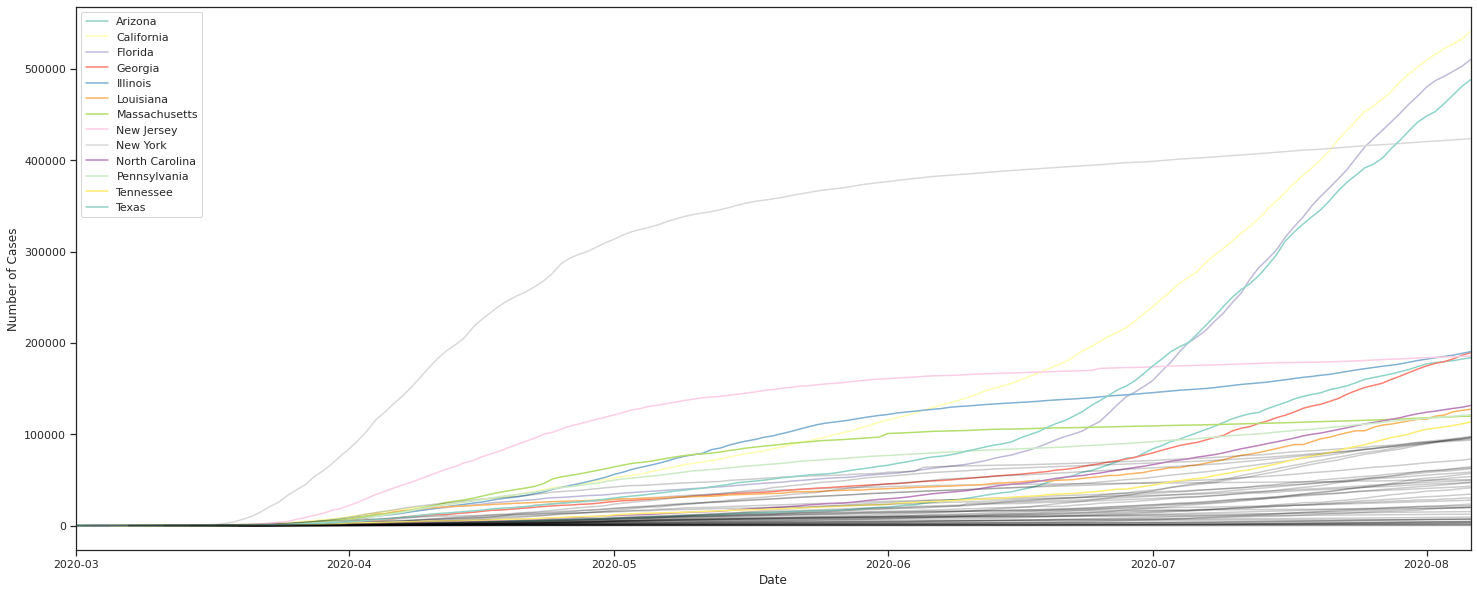

In [5]:
sb.set(context='notebook', style='ticks', palette='Set3')

fig, ax = plt.subplots(1,1,figsize=(25,10))
ax.set_xlim(min(sdata['New York']['datetime']), max(sdata['New York']['datetime']))
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')

for ss in uniq:

  if max(sdata[ss]['cases']) > 100000:
    ax.plot(sdata[ss]['datetime'], sdata[ss]['cases'], label=ss)

  else:
    ax.plot(sdata[ss]['datetime'], sdata[ss]['cases'], color = 'k', alpha=0.2)

ax.legend()

Plot Cases or Change in Cases? (Cases/Change)Change
State 1?New York
Another? (y/n)y
Next state?Florida
Another (y/n)?n


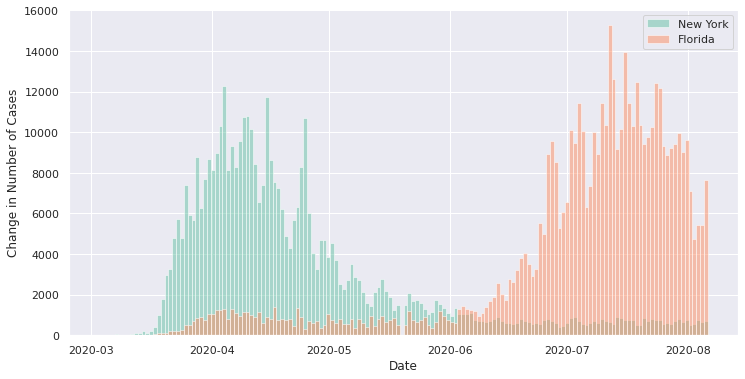

In [6]:
plot_w_inputs()

Plot Cases or Change in Cases? (Cases/Change)Cases
State 1?New York
Another? (y/n)y
Next state?Florida
Another (y/n)?n


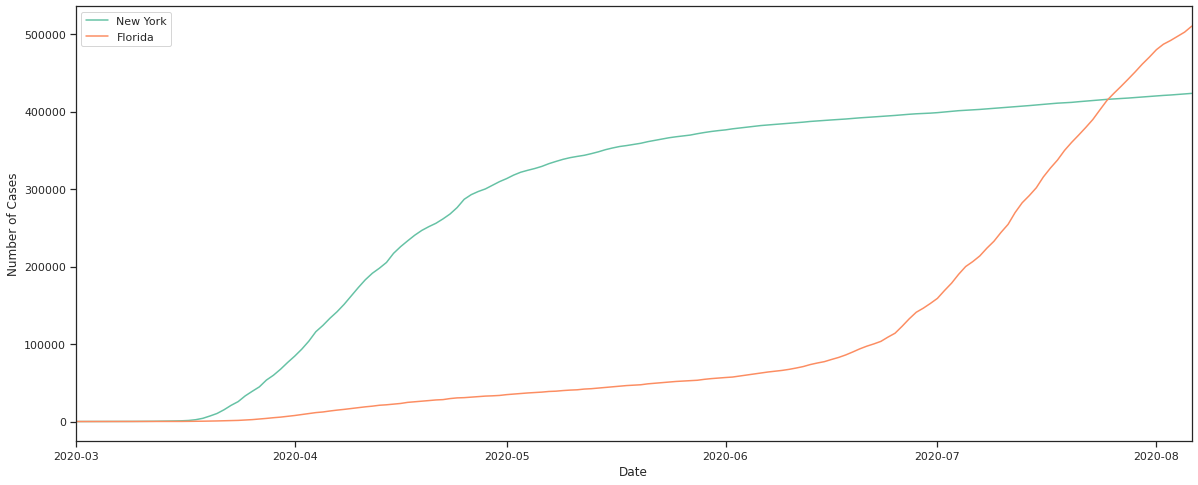

In [7]:
plot_w_inputs()